In [1]:
#chorus config
import librosa
import numpy as np
import math
import pyaudio
fs = 44100
delay_sec = 0.013
depth =0.003
mod_rate = 3.2  #Hz
feedback = 0.3
dry_wet = 0.4
CHUNK = 4096
FORMAT = pyaudio.paFloat32     # audio format (bytes per sample?)
CHANNELS = 1                 # single channel for microphone

delay_samples = np.round(delay_sec * fs)
depth_samples = np.round(depth*fs);

mod_arg = 2*3.1416*mod_rate/fs;
print('done')

done


In [35]:
from ctypes import *
prev_i =c_double(0.0)
mydll = cdll.LoadLibrary(r".\OLA.dll")
out = np.zeros([int(CHUNK)])
print('done')

done


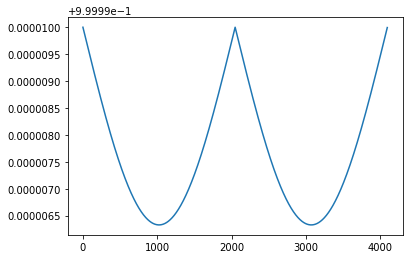

In [37]:
import matplotlib.pyplot as plt

x = np.ones([4096])
out = np.zeros([4096])
x = x.astype('float64');
mydll.ola(c_void_p(x.ctypes.data),c_void_p(out.ctypes.data))
plt.plot(out)
plt.show()


In [34]:
import _ctypes
_ctypes.FreeLibrary(mydll._handle)
# _ctypes.FreeLibrary(lib._handle)
print('done')

OSError: [WinError 126] 找不到指定的模組。

In [39]:

# pyaudio class instance
p = pyaudio.PyAudio()
# stream object to get data from microphone
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=fs,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)

print('stream started')
# for measuring frame rate
frame_count = 0
delay_chnl = np.zeros([CHUNK,1]);
delay_buf = np.zeros([int(delay_samples+depth_samples)])
# prev_i = 0;
mydll = cdll.LoadLibrary(r".\OLA.dll")
while True:
    # binary data

    data_byte = stream.read(CHUNK);
    x = np.frombuffer(data_byte, 'Float32').astype('float64');
    mydll.ola(c_void_p(x.ctypes.data),c_void_p(out.ctypes.data))

    encoded =  out.astype('float32').tobytes()
    
    stream.write(encoded)

stream.stop_stream() # pause audio stream
stream.close() # close audio stream

_ctypes.FreeLibrary(mydll._handle)

stream started


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.


KeyboardInterrupt: 

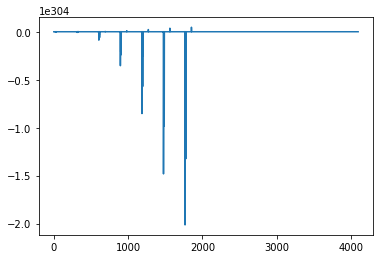

In [190]:
import matplotlib.pyplot as plt
plt.plot(out)
plt.show()


In [38]:
print(CHUNK)
print(out[404:500])


4096
[0.99999787 0.99999786 0.99999786 0.99999785 0.99999785 0.99999784
 0.99999784 0.99999783 0.99999783 0.99999783 0.99999782 0.99999782
 0.99999781 0.99999781 0.9999978  0.9999978  0.99999779 0.99999779
 0.99999778 0.99999778 0.99999778 0.99999777 0.99999777 0.99999776
 0.99999776 0.99999775 0.99999775 0.99999774 0.99999774 0.99999774
 0.99999773 0.99999773 0.99999772 0.99999772 0.99999771 0.99999771
 0.9999977  0.9999977  0.9999977  0.99999769 0.99999769 0.99999768
 0.99999768 0.99999767 0.99999767 0.99999767 0.99999766 0.99999766
 0.99999765 0.99999765 0.99999764 0.99999764 0.99999764 0.99999763
 0.99999763 0.99999762 0.99999762 0.99999761 0.99999761 0.99999761
 0.9999976  0.9999976  0.99999759 0.99999759 0.99999758 0.99999758
 0.99999758 0.99999757 0.99999757 0.99999756 0.99999756 0.99999755
 0.99999755 0.99999755 0.99999754 0.99999754 0.99999753 0.99999753
 0.99999752 0.99999752 0.99999752 0.99999751 0.99999751 0.9999975
 0.9999975  0.9999975  0.99999749 0.99999749 0.99999748 0.